In [1]:
import pandas as pd
import numpy as np
import pickle
import random
from matplotlib import pyplot as plt
from monotonic_check import monotonicity_mse, check_monotonicity
from critical_values_finder import find_critical_values, highest_and_lowest_indexes, find_several_critical_values
from calibration_check import calibration_check

In [2]:
#manter plots salver disco
#classe 

In [2]:
with open('models/XGBoost/XGBoost.pkl', 'rb') as f:
    XGBoost = pickle.load(f)
with open('models/LogisticRegression/LogisticRegression.pkl', 'rb') as f:
    LR = pickle.load(f)
with open('models/RandomForest/RandomForest.pkl', 'rb') as f:
    RF = pickle.load(f)
with open('models/SVM/SVMTitanic.pkl', 'rb') as f:
    SVM = pickle.load(f)
models = [XGBoost, LR, RF]


/usr/local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at y

In [3]:
df = pd.read_csv('../datasets/fraud_new.csv')
df_titanic = pd.read_csv('../datasets/TitanicClean.csv')
example = df.sample(1)
example = example.drop('isFraud', axis = 1)

In [5]:
example_titanic = df_titanic.sample(1)

Model: SVC
Feature PassengerId has monotonic behavior between ranges 1 and 891


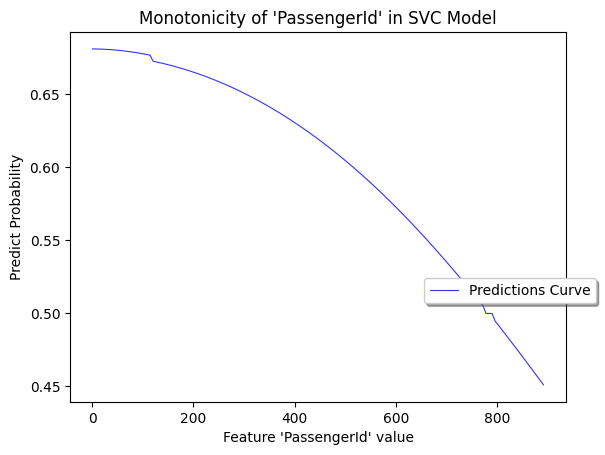

Model: SVC
Feature Pclass has monotonic behavior between ranges 1 and 3


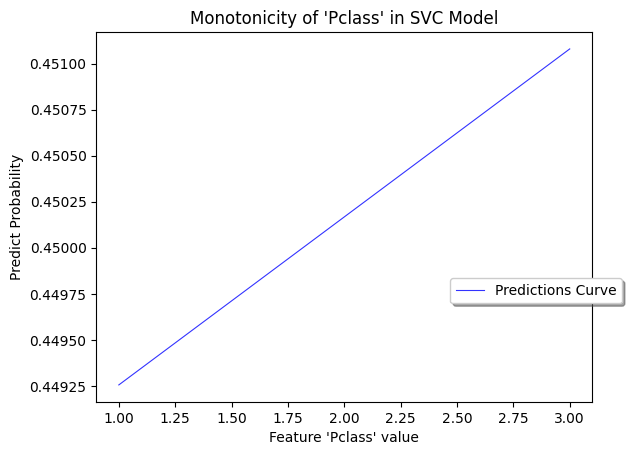

Model: SVC
Feature Age has monotonic behavior between ranges 0.42 and 80.0


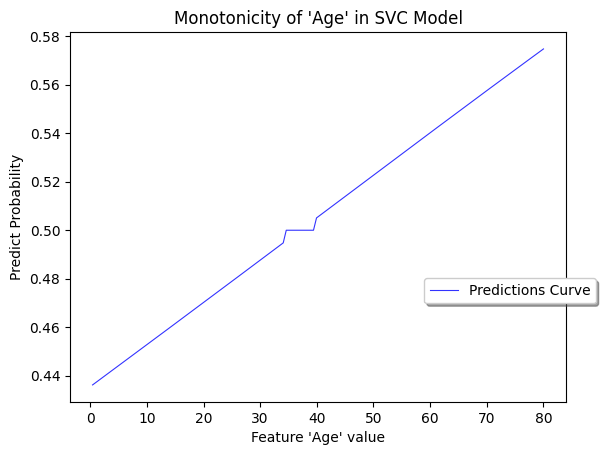

Model: SVC
Feature SibSp has monotonic behavior between ranges 0 and 8


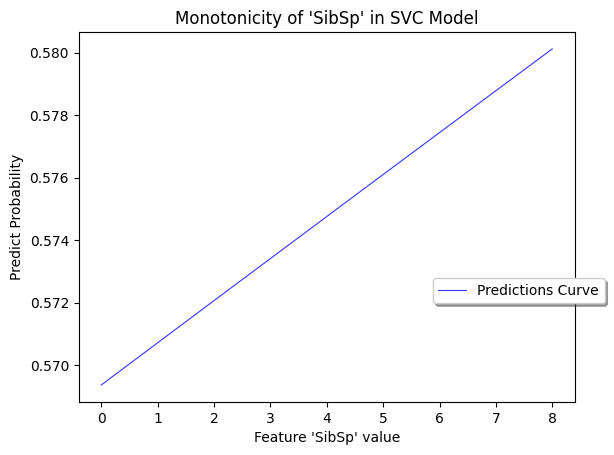

Model: SVC
Feature Parch has monotonic behavior between ranges 0 and 6


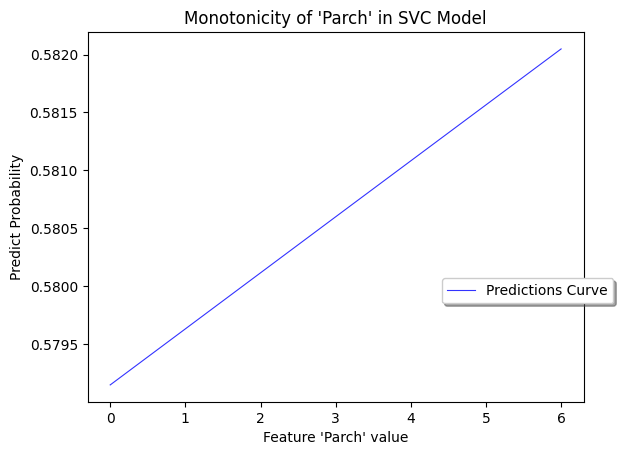

Model: SVC
Feature Fare has monotonic behavior between ranges 0.0 and 512.3292


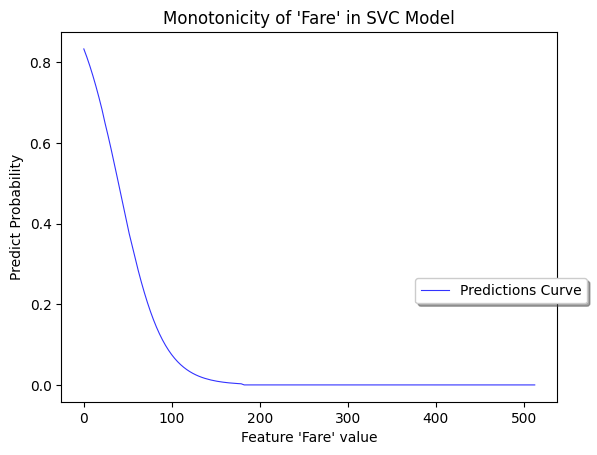

Model: SVC
Feature Sex_male has monotonic behavior between ranges 0 and 1


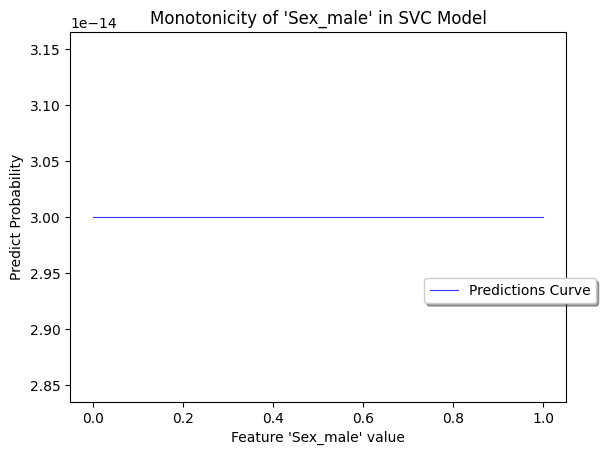

Model: SVC
Feature Embarked_Q has monotonic behavior between ranges 0 and 1


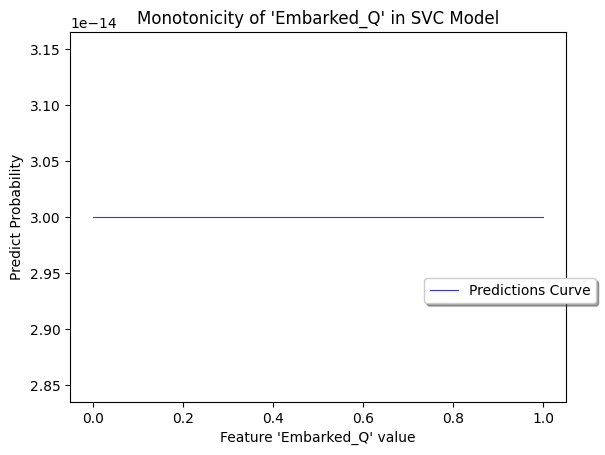

Model: SVC
Feature Embarked_S has monotonic behavior between ranges 0 and 1


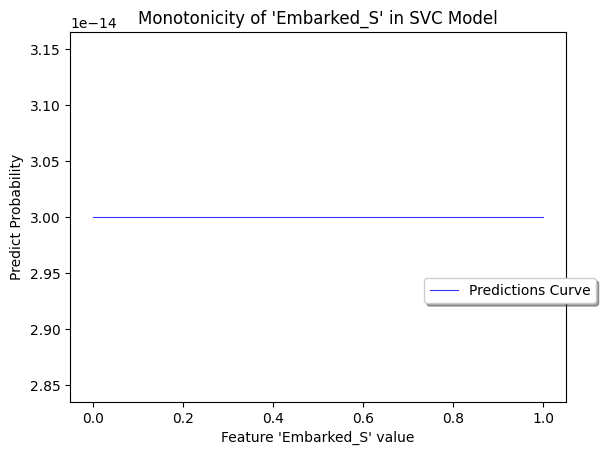

In [6]:
for c in df_titanic.columns:
    if c != 'isFraud':
        minV = df_titanic[c].min()
        maxV = df_titanic[c].max()
        check_monotonicity(c,minV,maxV,example_titanic, SVM, 150, plot_graph=True)

In [7]:
for c in df_titanic.columns:
    if c != 'isFraud':
        minV = 100
        maxV = 100
        find_critical_values(SVM, example_titanic, c, minV, maxV, step = 1000 )


Highest positives changes identified on feature 'step': 
	From values 225.848 to 233.343 : Predict proba diff = 0.10374867916107178
	From values 38.475 to 45.97 : Predict proba diff = 0.08292645215988159
	From values 675.545 to 683.04 : Predict proba diff = 0.046299099922180176
Highest negatives changes identified on feature 'step': 
	From values 405.727 to 413.222 : Predict proba diff = -0.32799994945526123
	From values 420.717 to 428.212 : Predict proba diff = -0.14000001549720764
	Warning, prediction has changed
	From values 30.98 to 38.475 : Predict proba diff = -0.09500002861022949


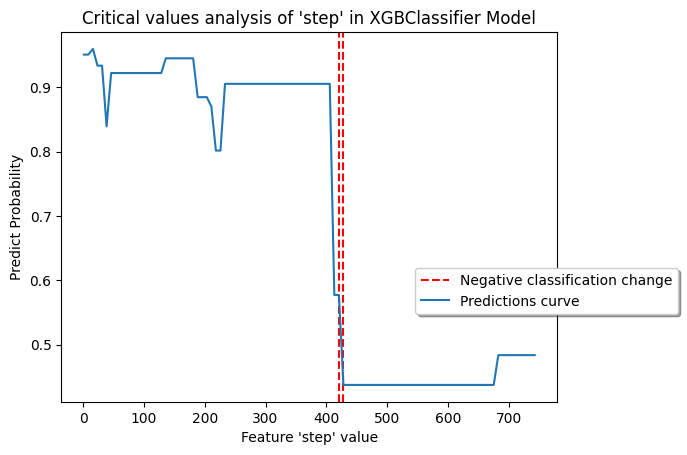

Highest negatives changes identified on feature 'step': 
	From values 713.02 to 720.515 : Predict proba diff = -0.15399999999999997
	Warning, prediction has changed
	From values 38.475 to 45.97 : Predict proba diff = -0.04600000000000004
	From values 15.99 to 23.485 : Predict proba diff = -0.018000000000000016


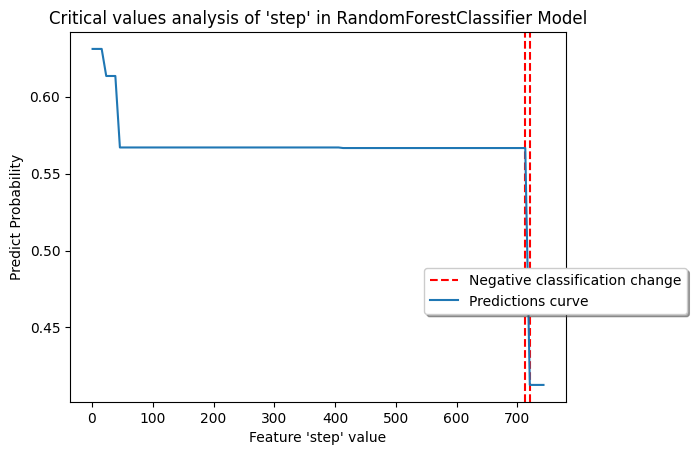


Highest positives changes identified on feature 'type': 
	From values 0.495 to 0.505 : Predict proba diff = 0.14175927639007568


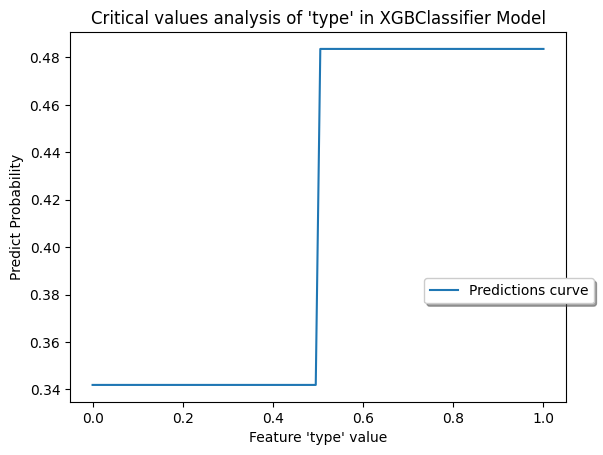

Highest negatives changes identified on feature 'type': 
	From values 0.495 to 0.505 : Predict proba diff = 0.0


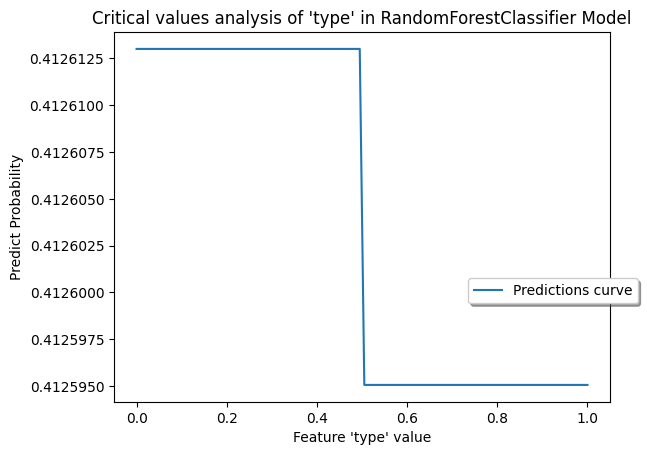


Highest positives changes identified on feature 'amount': 
	From values 0.0 to 933793.097 : Predict proba diff = 0.8750413656234741
	Warning, prediction has changed
Highest negatives changes identified on feature 'amount': 
	From values 2801379.292 to 3735172.389 : Predict proba diff = -0.1860000193119049
	Warning, prediction has changed
	From values 1867586.195 to 2801379.292 : Predict proba diff = -0.17799997329711914
	From values 933793.097 to 1867586.195 : Predict proba diff = -0.027000010013580322


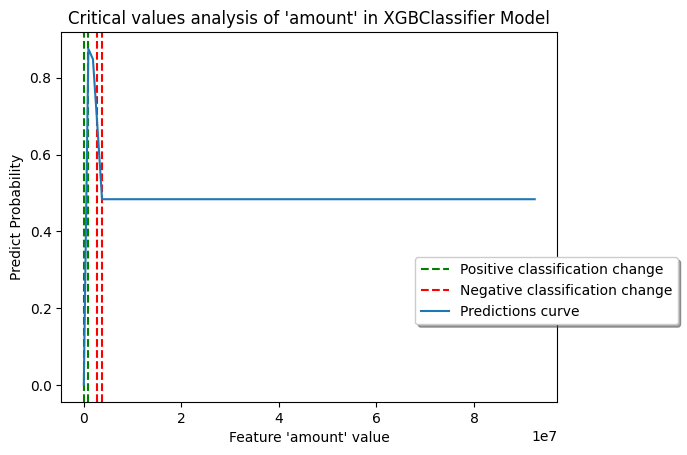


Highest positives changes identified on feature 'amount': 
	From values 0.0 to 933793.097 : Predict proba diff = 0.009985491924094925
Highest negatives changes identified on feature 'amount': 
	From values 933793.097 to 1867586.195 : Predict proba diff = -0.12300000000000005
	Warning, prediction has changed
	From values 1867586.195 to 2801379.292 : Predict proba diff = -0.0030000000000000027
	From values 2801379.292 to 3735172.389 : Predict proba diff = 0.0


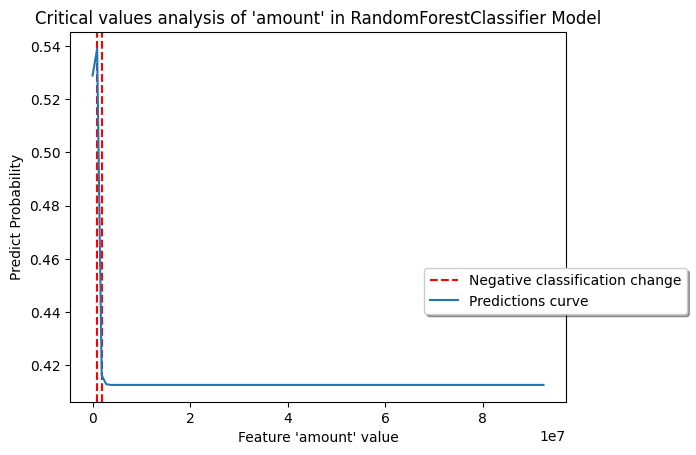

Highest negatives changes identified on feature 'oldBalanceOrig': 
	From values 2407476.379 to 3009345.473 : Predict proba diff = -0.382999986410141
	Warning, prediction has changed
	From values 601869.095 to 1203738.189 : Predict proba diff = -0.09500002861022949
	From values 0.0 to 601869.095 : Predict proba diff = -0.03600001335144043


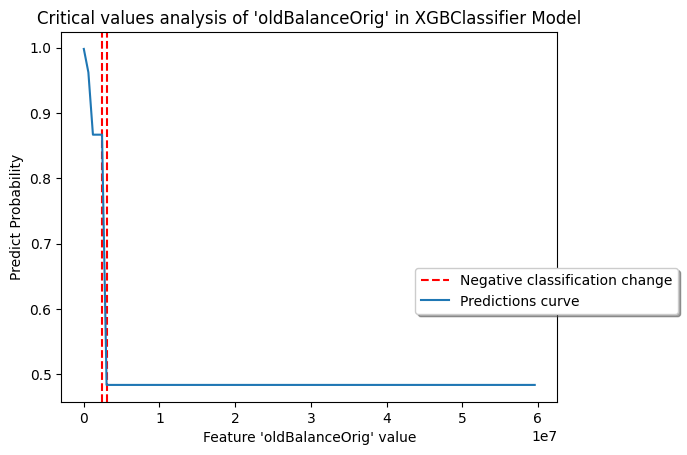

Highest negatives changes identified on feature 'oldBalanceOrig': 
	From values 601869.095 to 1203738.189 : Predict proba diff = -0.123
	Warning, prediction has changed
	From values 1203738.189 to 1805607.284 : Predict proba diff = -0.056999999999999995
	From values 1805607.284 to 2407476.379 : Predict proba diff = -0.010000000000000009


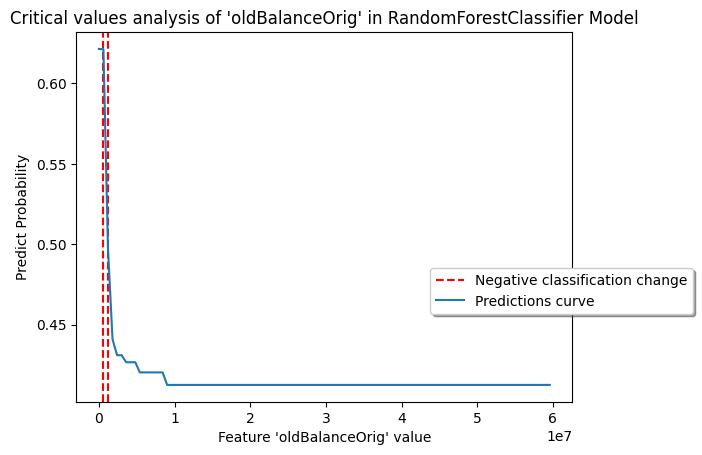

Highest negatives changes identified on feature 'newBalanceOrig': 
	From values 1001717.987 to 1502576.981 : Predict proba diff = -0.4960000216960907
	Warning, prediction has changed
	From values 0.0 to 500858.994 : Predict proba diff = -0.019999980926513672


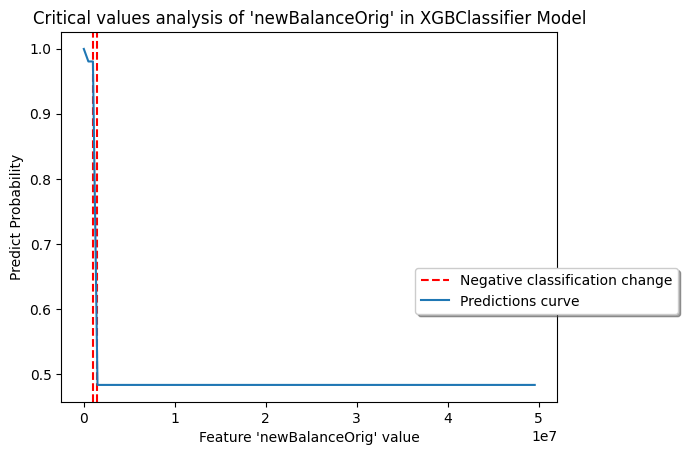


Highest positives changes identified on feature 'newBalanceOrig': 
	From values 0.0 to 500858.994 : Predict proba diff = 0.08229015321516686
Highest negatives changes identified on feature 'newBalanceOrig': 
	From values 4507730.943 to 5008589.936 : Predict proba diff = -0.0040000000000000036


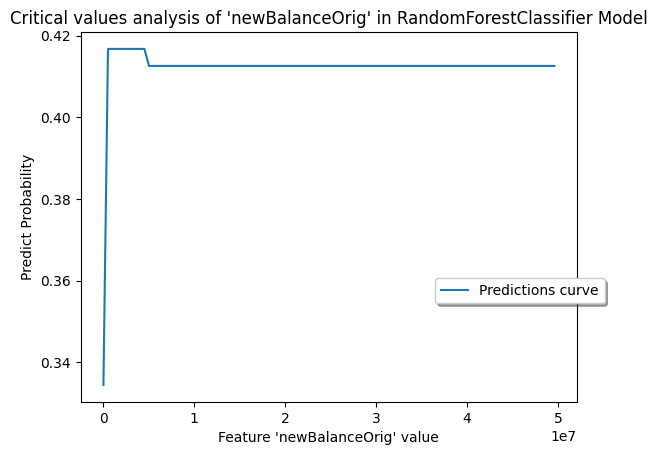


Highest positives changes identified on feature 'oldBalanceDest': 
	From values 0.0 to 3596120.094 : Predict proba diff = 0.454739511013031


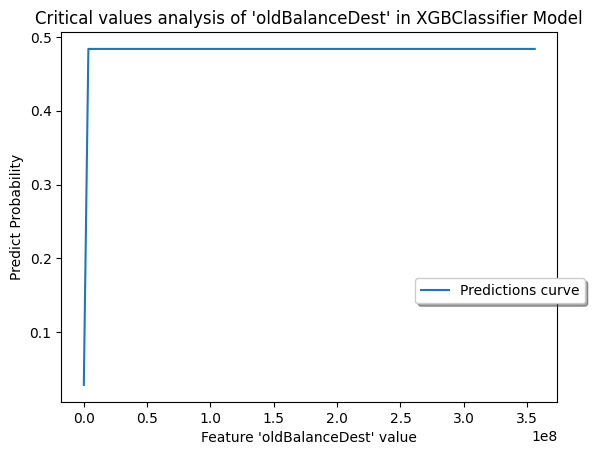


Highest positives changes identified on feature 'oldBalanceDest': 
	From values 0.0 to 3596120.094 : Predict proba diff = 0.06926331058916141


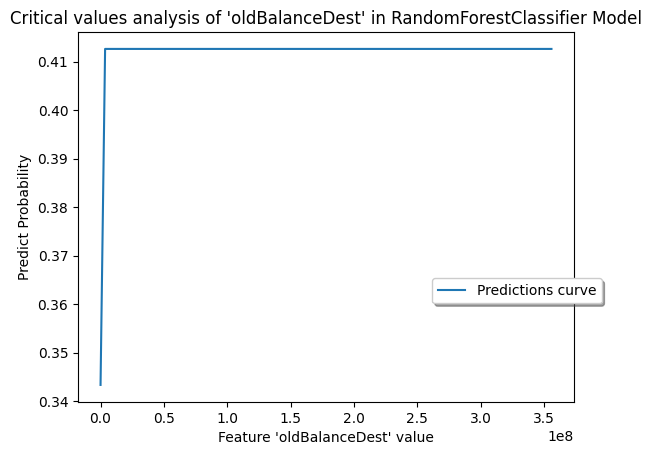


Highest positives changes identified on feature 'newBalanceDest': 
	From values 0.0 to 3597770.494 : Predict proba diff = 0.7393982410430908
	Warning, prediction has changed
Highest negatives changes identified on feature 'newBalanceDest': 
	From values 3597770.494 to 7195540.988 : Predict proba diff = -0.2629999816417694
	Warning, prediction has changed


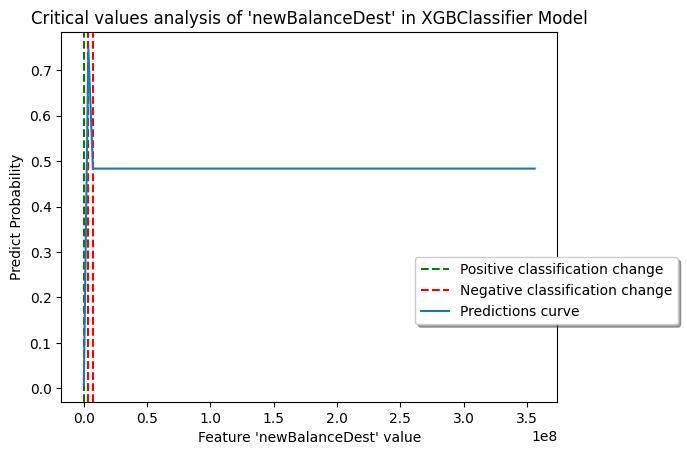


Highest positives changes identified on feature 'newBalanceDest': 
	From values 0.0 to 3597770.494 : Predict proba diff = 0.037607957748077125


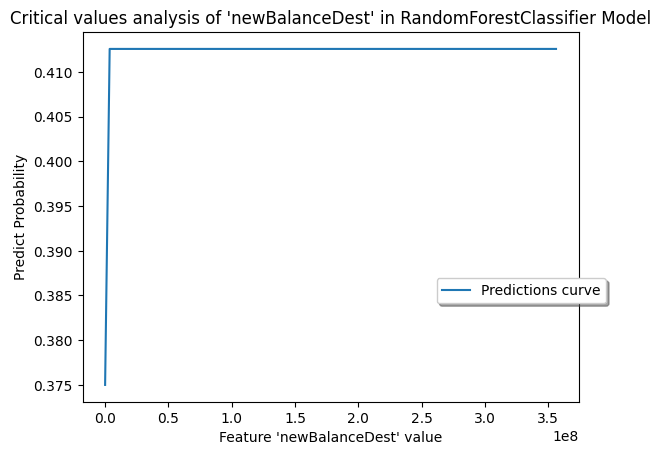


Highest positives changes identified on feature 'errorBalanceOrig': 
	From values -0.01 to 933793.087 : Predict proba diff = 0.3623417615890503
	From values 1867586.185 to 2801379.282 : Predict proba diff = 0.2533087134361267
Highest negatives changes identified on feature 'errorBalanceOrig': 
	From values 933793.087 to 1867586.185 : Predict proba diff = -0.1339999884366989


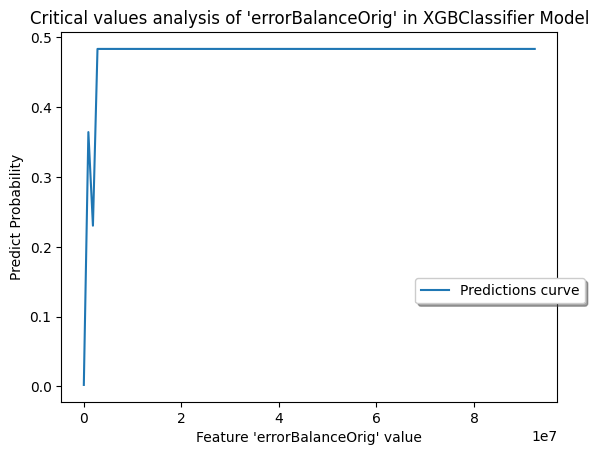

Highest negatives changes identified on feature 'errorBalanceOrig': 
	From values -0.01 to 933793.087 : Predict proba diff = -0.0050000000000000044
	From values 2801379.282 to 3735172.38 : Predict proba diff = 0.0


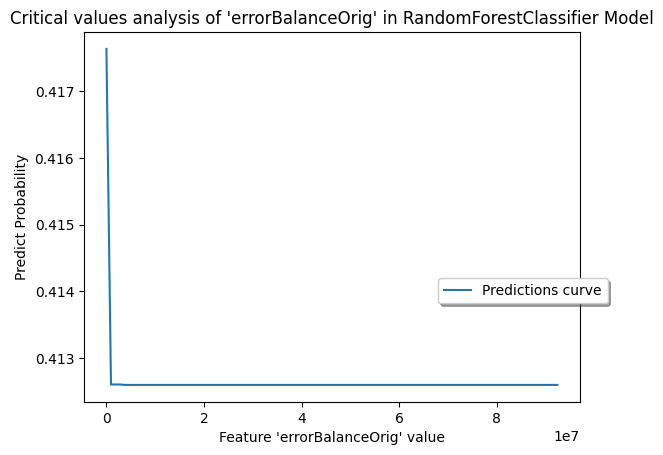

Highest negatives changes identified on feature 'errorBalanceDest': 
	From values -410390.985 to 457141.597 : Predict proba diff = -0.5160000324249268
	Warning, prediction has changed
	From values -1277923.568 to -410390.985 : Predict proba diff = 0.0


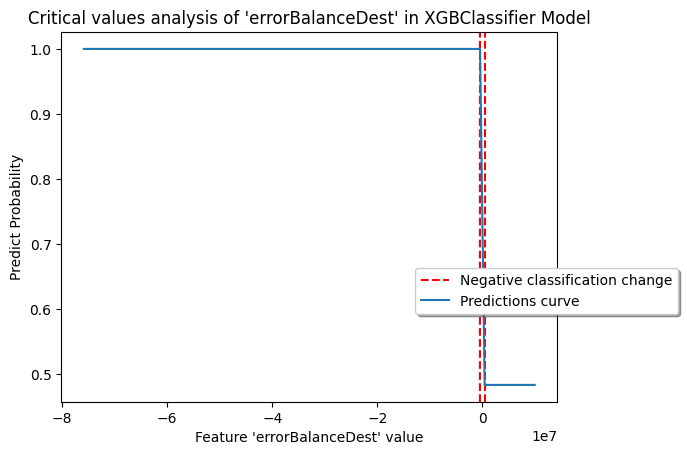

Highest negatives changes identified on feature 'errorBalanceDest': 
	From values 457141.597 to 1324674.179 : Predict proba diff = -0.07500000000000001
	Warning, prediction has changed
	From values 8264934.836 to 9132467.418 : Predict proba diff = -0.020000000000000018
	From values 4794804.507 to 5662337.089 : Predict proba diff = -0.015000000000000013


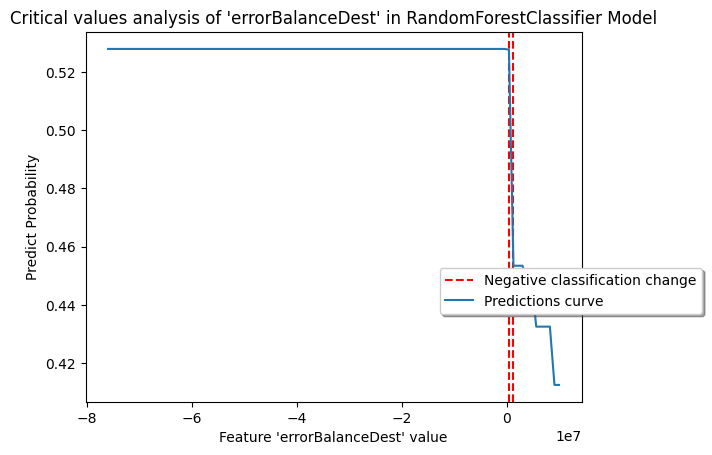

In [17]:
for c in df.columns:
    if c != 'isFraud':
        minV = df[c].min()
        maxV = df[c].max()
        for model in models:
            find_critical_values(model, example, c, minV, maxV, )

Model: XGBClassifier
Feature 'step' has a monotonicity MSE score of 0.009391251020133495


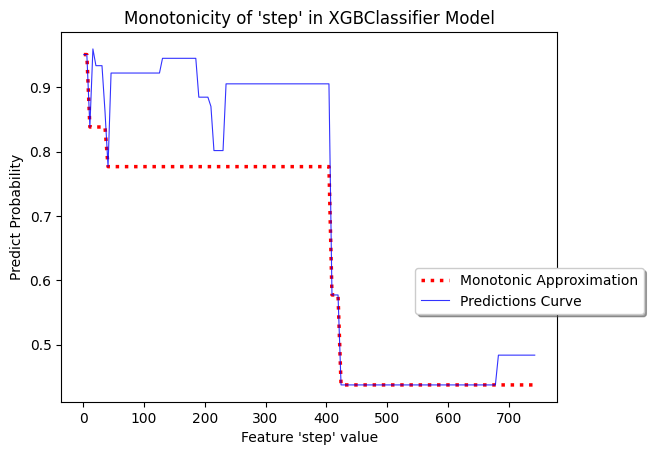

Model: LogisticRegression
Feature step has monotonic behavior between ranges 1 and 743


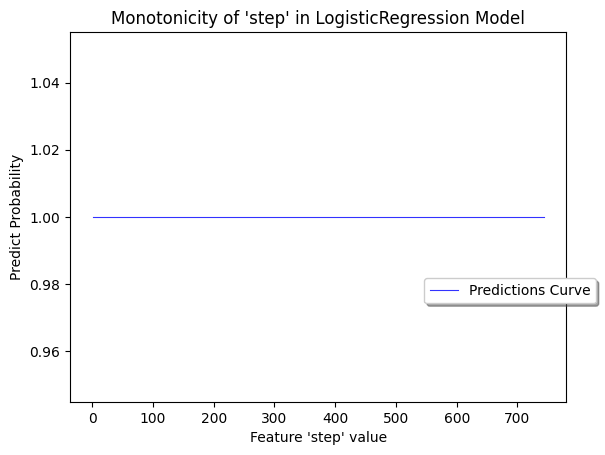

Model: RandomForestClassifier
Feature step has monotonic behavior between ranges 1 and 743


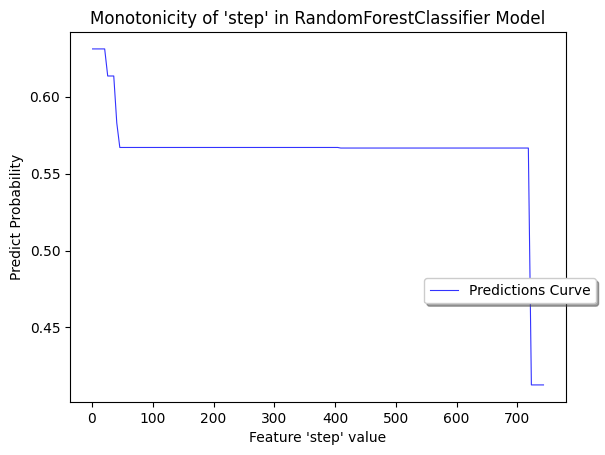

Model: XGBClassifier
Feature type has monotonic behavior between ranges 0 and 1


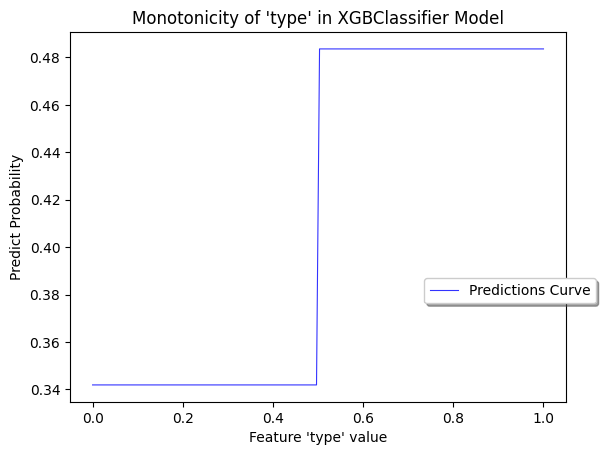

Model: LogisticRegression
Feature type has monotonic behavior between ranges 0 and 1


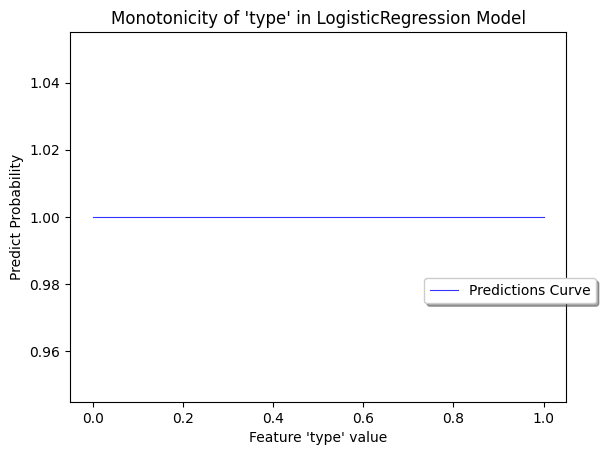

Model: RandomForestClassifier
Feature type has monotonic behavior between ranges 0 and 1


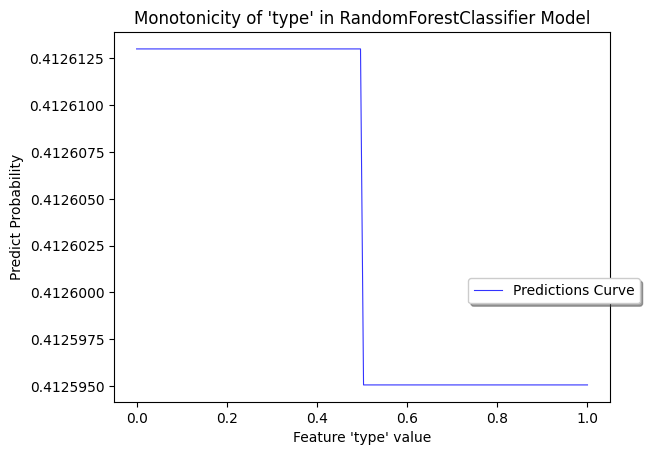

Model: XGBClassifier
Feature 'amount' has a monotonicity MSE score of 0.19643501937389374


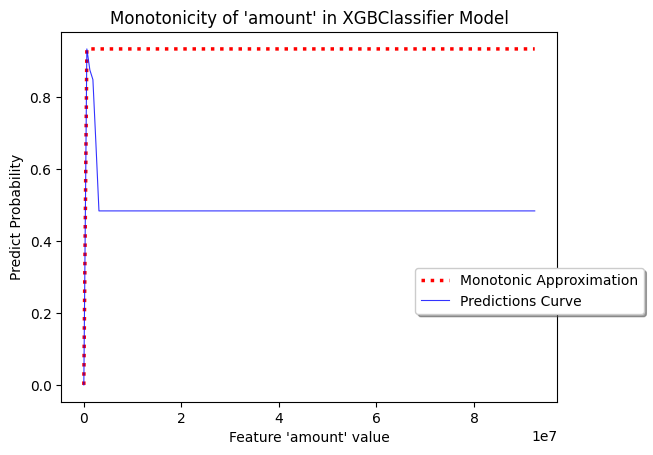

Model: LogisticRegression
Feature amount has monotonic behavior between ranges 0.0 and 92445516.64


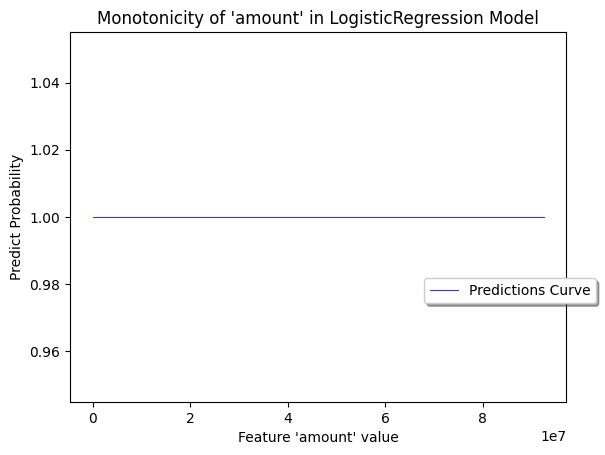

Model: RandomForestClassifier
Feature 'amount' has a monotonicity MSE score of 5.440966907217464e-06


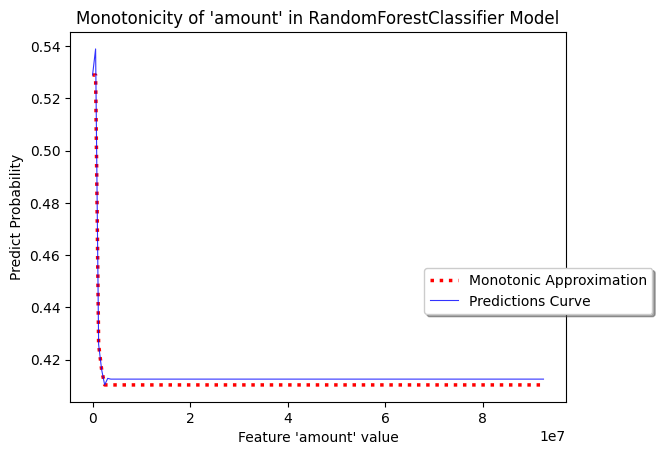

Model: XGBClassifier
Feature oldBalanceOrig has monotonic behavior between ranges 0.0 and 59585040.37


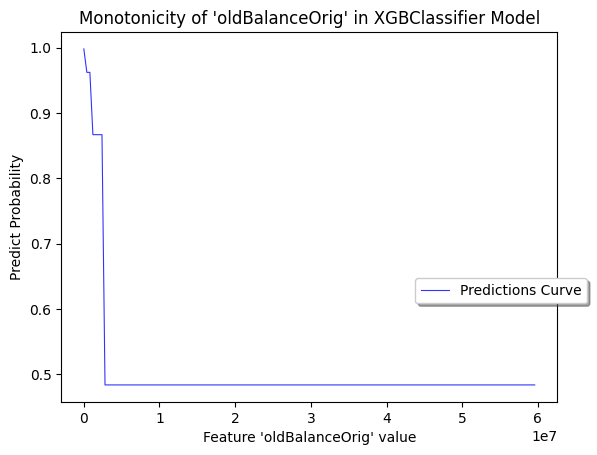

Model: LogisticRegression
Feature oldBalanceOrig has monotonic behavior between ranges 0.0 and 59585040.37


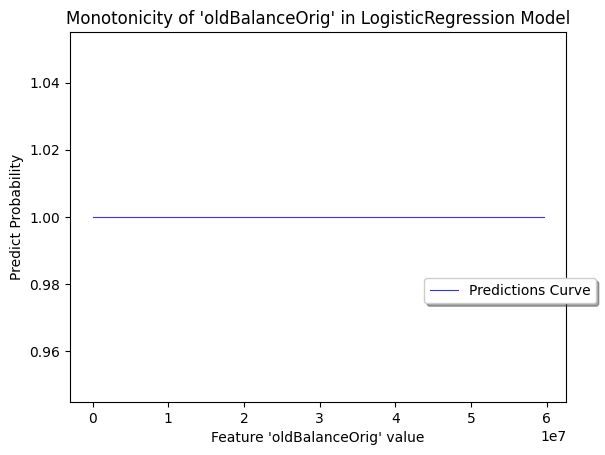

Model: RandomForestClassifier
Feature oldBalanceOrig has monotonic behavior between ranges 0.0 and 59585040.37


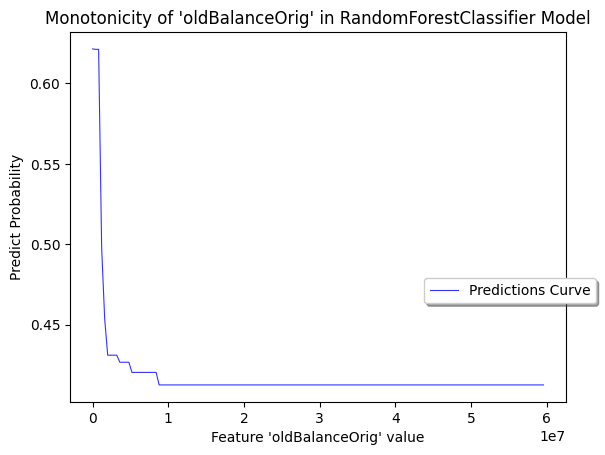

Model: XGBClassifier
Feature newBalanceOrig has monotonic behavior between ranges 0.0 and 49585040.37


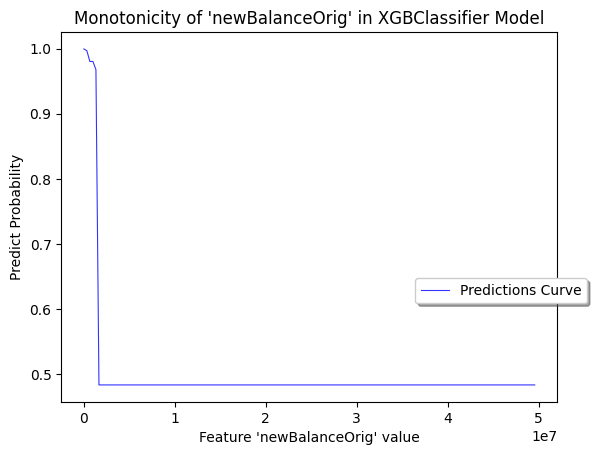

Model: LogisticRegression
Feature newBalanceOrig has monotonic behavior between ranges 0.0 and 49585040.37


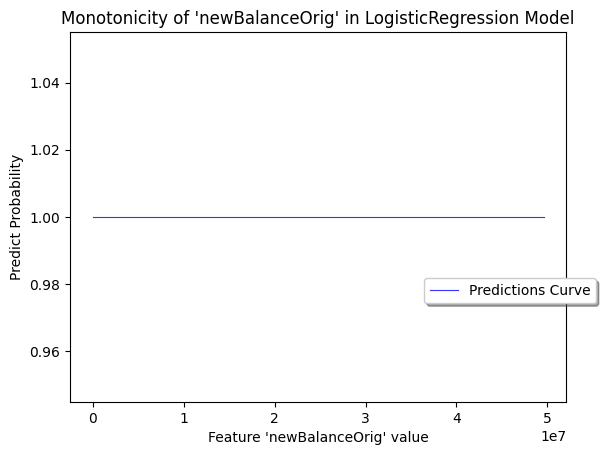

Model: RandomForestClassifier
Feature 'newBalanceOrig' has a monotonicity MSE score of 1.573806489845415e-05


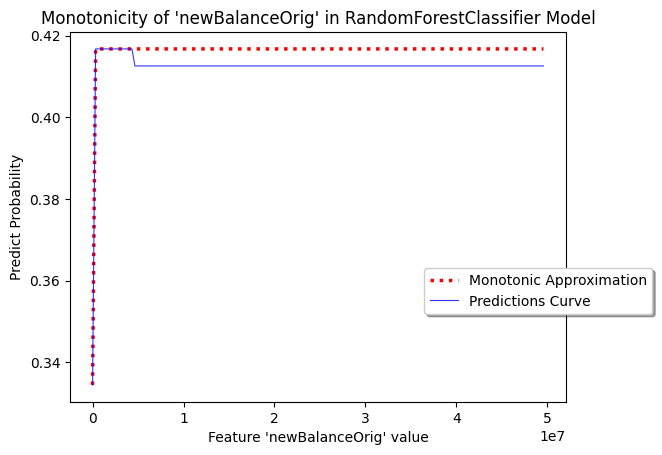

Model: XGBClassifier
Feature oldBalanceDest has monotonic behavior between ranges 0.0 and 356015889.35


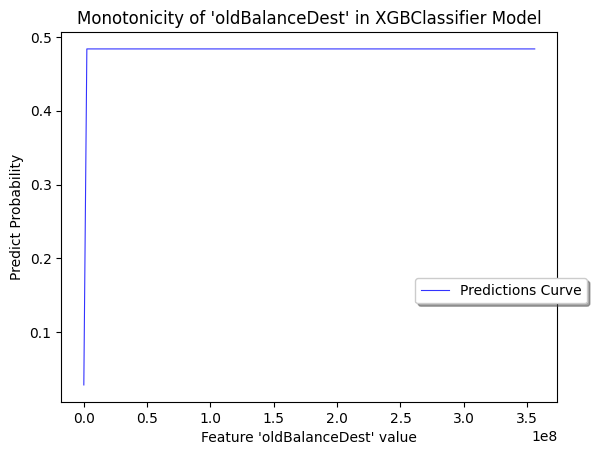

Model: LogisticRegression
Feature oldBalanceDest has monotonic behavior between ranges 0.0 and 356015889.35


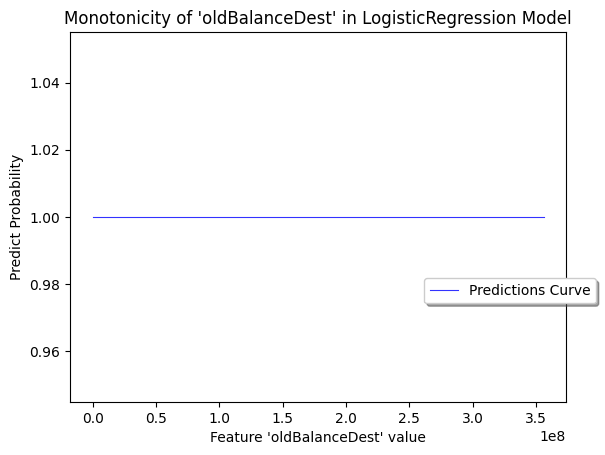

Model: RandomForestClassifier
Feature oldBalanceDest has monotonic behavior between ranges 0.0 and 356015889.35


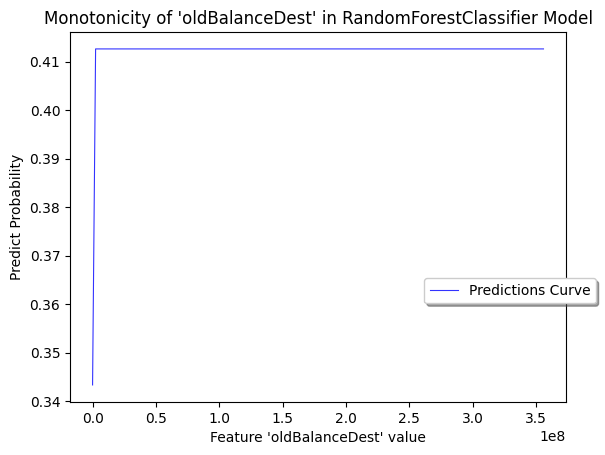

Model: XGBClassifier
Feature 'newBalanceDest' has a monotonicity MSE score of 0.09287983924150467


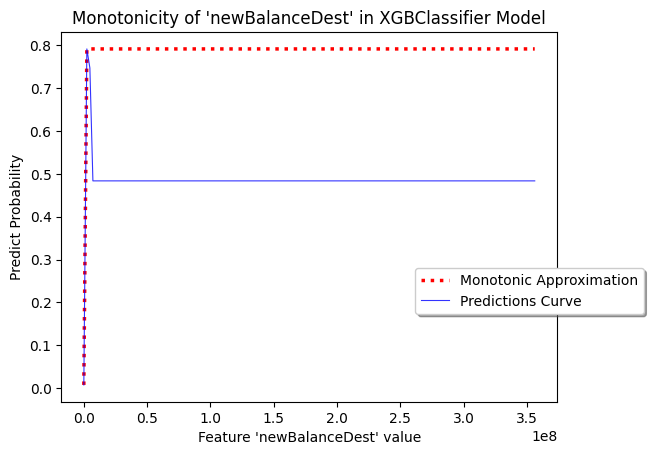

Model: LogisticRegression
Feature newBalanceDest has monotonic behavior between ranges 0.0 and 356179278.92


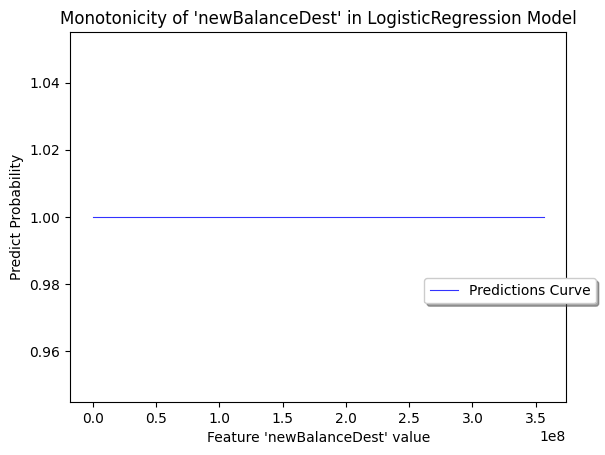

Model: RandomForestClassifier
Feature newBalanceDest has monotonic behavior between ranges 0.0 and 356179278.92


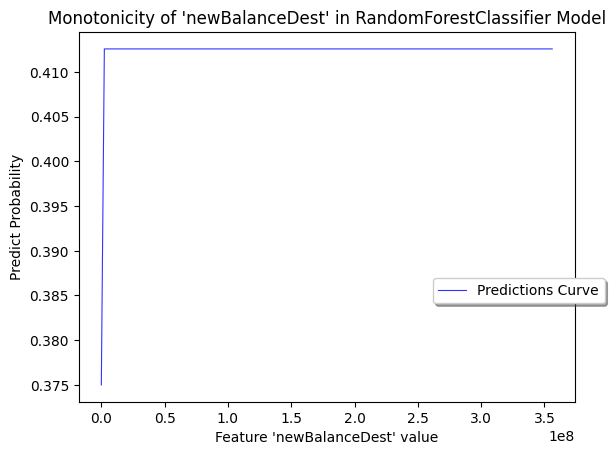

Model: XGBClassifier
Feature 'errorBalanceOrig' has a monotonicity MSE score of 0.00011994544183835387


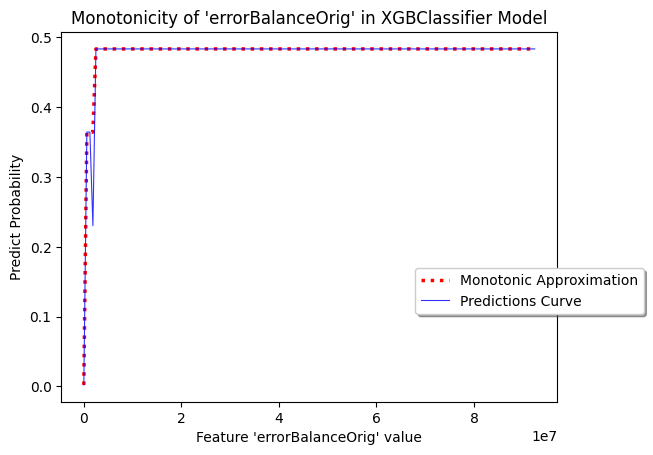

Model: LogisticRegression
Feature errorBalanceOrig has monotonic behavior between ranges -0.0100000016391277 and 92445516.64


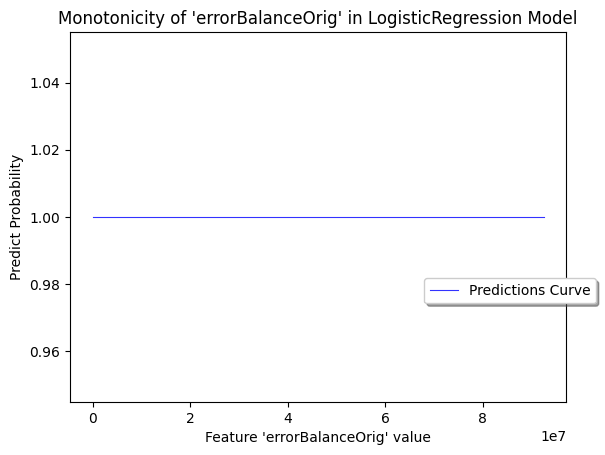

Model: RandomForestClassifier
Feature errorBalanceOrig has monotonic behavior between ranges -0.0100000016391277 and 92445516.64


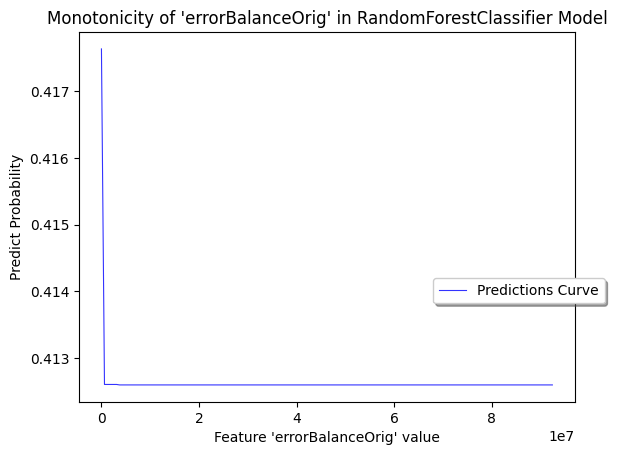

Model: XGBClassifier
Feature errorBalanceDest has monotonic behavior between ranges -75885725.63000001 and 10000000.0


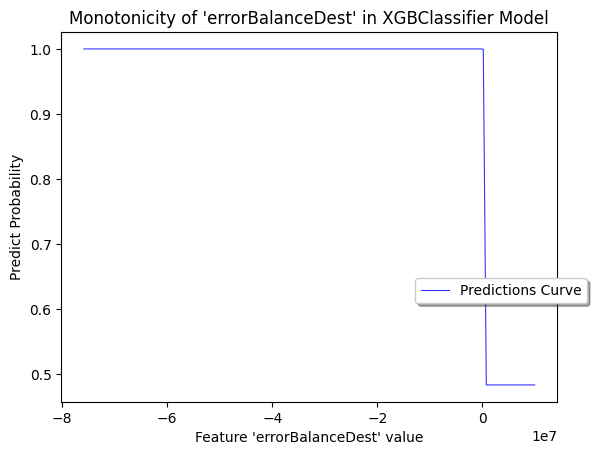

Model: LogisticRegression
Feature errorBalanceDest has monotonic behavior between ranges -75885725.63000001 and 10000000.0


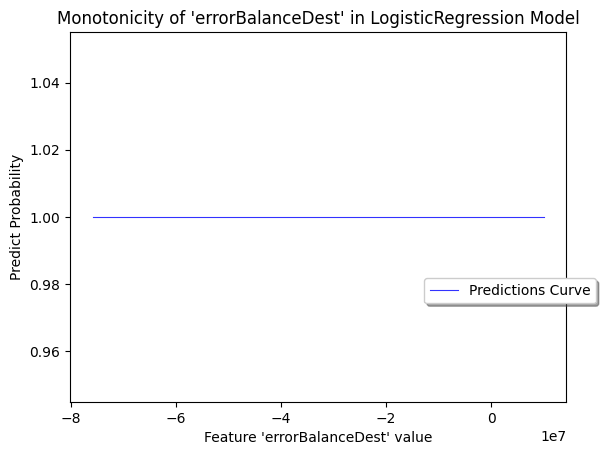

Model: RandomForestClassifier
Feature errorBalanceDest has monotonic behavior between ranges -75885725.63000001 and 10000000.0


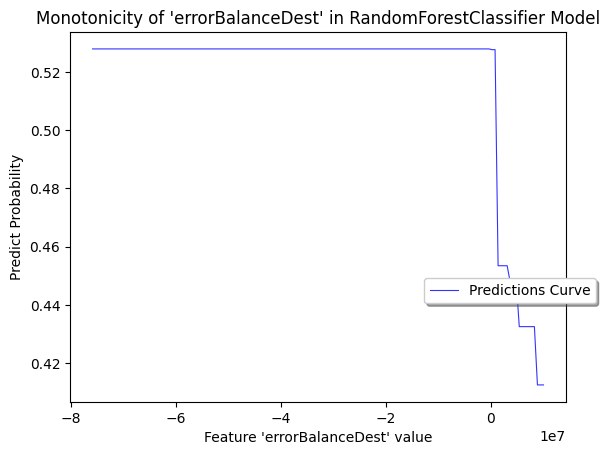

In [9]:
i = 0
for c in df.columns:
    if c != 'isFraud':
        minV = df[c].min()
        maxV = df[c].max()
        for model in models:
            check_monotonicity(c,minV,maxV,example, model, 150, plot_graph=True)

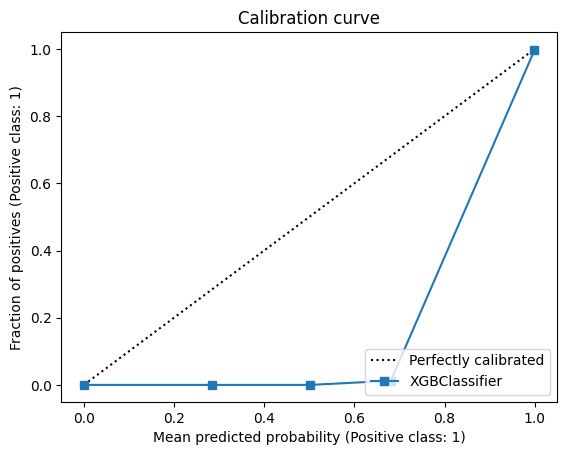

Brier Score Loss: 3.798964224303799e-05 for model XGBClassifier


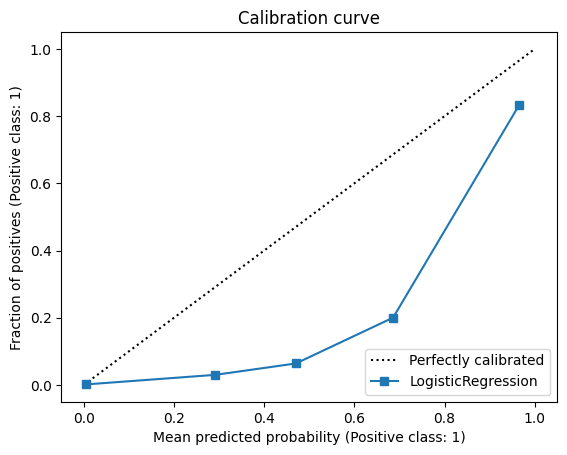

Brier Score Loss: 0.003402447847732624 for model LogisticRegression


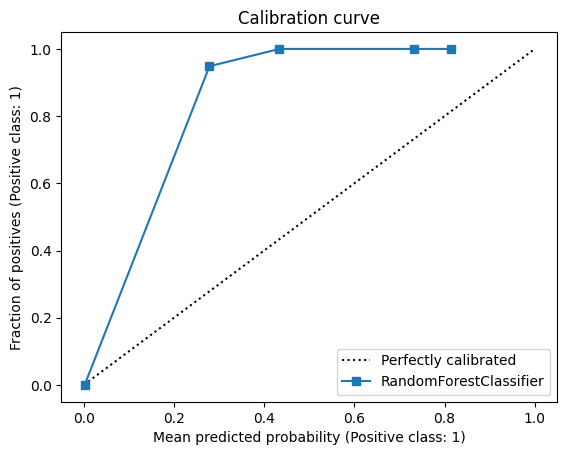

Brier Score Loss: 0.0017698572499968831 for model RandomForestClassifier


In [14]:
for model in models:
    calibration_check("isFraud", model, df, True)

In [4]:

X = df.drop(['isFraud'], axis=1)
teste_ = X.iloc[0:1000]
c = "step"
minV = X[c].min()
maxV = X[c].max()
aa = find_several_critical_values(LR, teste_, c, minV,maxV)
    

Positive means:
	Mean: 0.0031482072754619476
	Median: 5.043282369499025e-08
	Sandard Deviation: 0.006888731154287346
	Variance: 4.745461691604907e-05
Negative means:
	Mean: 0.0
	Median: 0.0
	Sandard Deviation: 0.0
	Variance: 0.0


<Figure size 900x450 with 0 Axes>